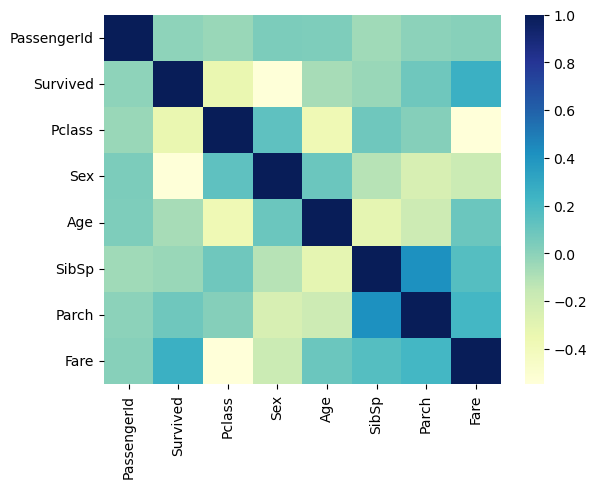

Number of test samples: 214
Epoch 0: Loss = 0.6931471805599454
Epoch 100: Loss = 0.5927018844377072
Epoch 200: Loss = 0.54029548599188
Epoch 300: Loss = 0.510032794222798
Epoch 400: Loss = 0.49109544903784763
Epoch 500: Loss = 0.4785123040911446
Epoch 600: Loss = 0.4697633588758384
Epoch 700: Loss = 0.4634628456746159
Epoch 800: Loss = 0.45879720489050385
Epoch 900: Loss = 0.45526294449118904
Final weights: [-0.3611699   0.06902303 -0.63329879 -1.01456777 -0.21269394 -0.14539158
 -0.03259939  0.23423224]
Training Accuracy: 78.20%
Test Accuracy: 76.64%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\samya\Documents\New folder\titanic.csv")

df['Sex']=df['Sex'].map({'male':1,'female':0})

sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.dropna()
x = df_numeric.drop('Survived', axis=1).values 
y = df_numeric['Survived'].values

x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
x = (x - x_mean) / x_std

x=np.hstack((np.ones((x.shape[0],1)),x))

test_size = 0.3
n_samples = x.shape[0] 
n_test_samples = int(n_samples * test_size) 
print("Number of test samples:", n_test_samples)
indices = np.arange(n_samples)  
np.random.shuffle(indices)  
train_indices = indices[n_test_samples:]  
test_indices = indices[:n_test_samples] 
x_train = x[train_indices] 
y_train = y[train_indices]  
x_test = x[test_indices] 
y_test = y[test_indices] 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(x, y, learning_rate=0.01, epochs=1000):
    weights = np.zeros(x.shape[1])  
    for epoch in range(epochs):
        
        z = np.dot(x, weights)
        predictions = sigmoid(z)
        
        
        gradient = np.dot(x.T, (predictions - y)) / y.size
        
        
        weights -= learning_rate * gradient
        
        
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            print(f"Epoch {epoch}: Loss = {loss}")
    
    
    print("Final weights:", weights)
    return weights

weights = logistic_regression(x_train, y_train)

if weights is None:
    print("Error: weights were not returned correctly from logistic_regression.")
else:
    
    def predict(x, weights):
        return sigmoid(np.dot(x, weights)) >= 0.5

    
    y_pred_train = predict(x_train, weights)
    y_pred_test = predict(x_test, weights)

    
    train_accuracy = np.mean(y_pred_train == y_train) * 100
    test_accuracy = np.mean(y_pred_test == y_test) * 100

    print(f"Training Accuracy: {train_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
